# Bitcoin and other currencies by time

In [1]:
!pip install pycoingecko


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [4]:
bitcoin_data =cg.get_coin_market_chart_by_id(id = 'bitcoin',vs_currency = 'usd',days = 30)

In [5]:
print(bitcoin_data)

bitcoin_data.keys()

{'prices': [[1729113202582, 67596.02174447977], [1729116821759, 67624.8457334718], [1729120393561, 67717.24474102454], [1729123301109, 67647.54414766871], [1729127251857, 67696.5070636146], [1729130663808, 67858.8459657333], [1729134149740, 67459.34522207073], [1729137883086, 67575.81038181401], [1729141974108, 67329.12323409185], [1729144943759, 67339.18303715023], [1729149211508, 67108.18186118477], [1729152164533, 67282.61792681798], [1729156642522, 67400.56598022403], [1729159694652, 67260.94179047293], [1729163151521, 67237.08796399015], [1729166869519, 66909.04088406198], [1729170443905, 67111.571368663], [1729174772362, 66882.70873243679], [1729177706255, 67027.42751254764], [1729180850678, 67542.60133051021], [1729185576770, 67488.37855293385], [1729188067290, 67264.69569765788], [1729192137050, 66864.1449497314], [1729196186997, 66966.57629938495], [1729199839679, 67020.35821683521], [1729202835388, 67172.52423732623], [1729206629526, 67359.62994960629], [1729210250095, 67384.

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [6]:
import pandas as pd

data = pd.DataFrame(bitcoin_data['prices'],columns=['TimeStamp','Price'])

data['Date'] = pd.to_datetime(data['TimeStamp'], unit = 'ms')


(array([20013., 20017., 20021., 20025., 20028., 20032., 20036., 20040.,
        20044.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

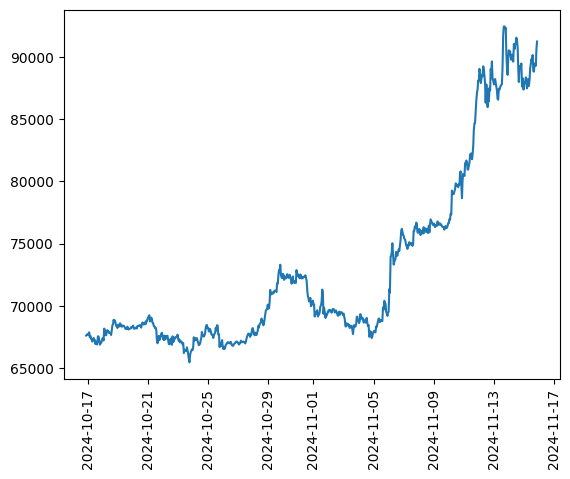

In [7]:
import matplotlib.pyplot as plt

fechas = data['Date'].to_numpy()
precios = data['Price'].to_numpy()

plt.plot(fechas, precios)
plt.xticks(rotation=90)

In [8]:

import plotly.graph_objects as go

# Group data by date and get min, max, first, and last prices
candlestick_data = data.groupby(data.Date.dt.date).agg({'Price': ['min', 'max', 'first', 'last']})

# Create candlestick figure
fig = go.Figure(data=[go.Candlestick(
    x=candlestick_data.index,
    open=candlestick_data[('Price', 'first')],
    high=candlestick_data[('Price', 'max')],
    low=candlestick_data[('Price', 'min')],
    close=candlestick_data[('Price', 'last')]
)])

# Update layout
fig.update_layout(
    xaxis_rangeslider_visible=False,
    xaxis_title='Date',
    yaxis_title='Price (USD $)',
    title='Bitcoin Candlestick Chart Over Past 30 Days'
)

fig.show()